In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Images loaded successfully.


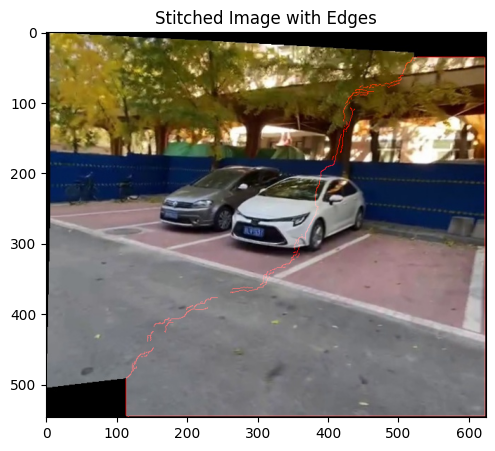

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 加载遮罩图像
mask1_path = '/inspurfs/group/gaoshh/jinjiping/UDIS2/composition/learn_mask1/000525.jpg'
mask2_path = '/inspurfs/group/gaoshh/jinjiping/UDIS2/composition/learn_mask1/000525.jpg'
stitched_img_path = '/inspurfs/group/gaoshh/jinjiping/UDIS2/composition/composition/000525.jpg'

mask1 = cv2.imread(mask1_path, 0)
mask2 = cv2.imread(mask2_path, 0)
stitched_img = cv2.imread(stitched_img_path)

# 检查图像是否加载成功
if mask1 is None or mask2 is None or stitched_img is None:
    print("Error loading images. Check paths:")
    print("mask1:", mask1_path)
    print("mask2:", mask2_path)
    print("stitched_img:", stitched_img_path)
else:
    print("Images loaded successfully.")

# 检测遮罩的边缘
edges1 = cv2.Canny(mask1, 100, 200)
edges2 = cv2.Canny(mask2, 100, 200)

# 结合两个边界
combined_edges = cv2.bitwise_or(edges1, edges2)

# 为了在拼接图像中显示边界，我们将边界线着色为红色
# 创建一个全红色的图像
red_edges = np.zeros_like(stitched_img)
red_edges[:, :, 2] = combined_edges  # 只在红色通道上赋值边界

# 将红色边界叠加到拼接图像上
stitched_with_edges = cv2.addWeighted(stitched_img, 1, red_edges, 1, 0)

# 显示结果
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(stitched_with_edges, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image with Edges')
plt.show()


# 如果需要保存结果
# cv2.imwrite('/public/home/jinjiping2023/OASD/oasd/test-data/stitched_with_edges.png', stitched_with_edges)


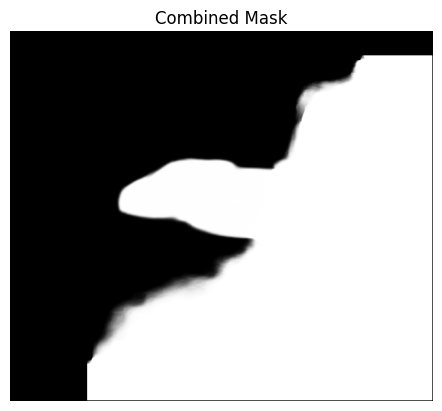

In [5]:
mask1 = cv2.imread('/inspurfs/group/gaoshh/jinjiping/UDIS2/composition/learn_mask1/000525.jpg', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread("/inspurfs/group/gaoshh/jinjiping/UDIS2/UDIS-D/testing/testing/warp1_after_object_detection/000525.png", cv2.IMREAD_GRAYSCALE)
combined_mask = cv2.add(mask1, mask2)

plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('off')
plt.show()